In [1]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import numpy as np
from scipy.stats import sem
from sklearn import metrics
import pandas as pd
target_names = ['non-patient', 'patient']

In [2]:
def CI(y_true, y_pred):
    n_bootstraps = 1000
    rng_seed = 42  # control reproducibility
    bootstrapped_scores = []

    rng = np.random.RandomState(rng_seed)
    for i in range(n_bootstraps):
        # bootstrap by sampling with replacement on the prediction indices
        indices = rng.randint(0, len(y_pred), len(y_pred))
        if len(np.unique(y_true[indices])) < 2:
            # We need at least one positive and one negative sample for ROC AUC
            # to be defined: reject the sample
            continue

        score = roc_auc_score(y_true[indices], y_pred[indices])
        bootstrapped_scores.append(score)
        #print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))

    sorted_scores = np.array(bootstrapped_scores)
    sorted_scores.sort()
    confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
    confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
    print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
        confidence_lower, confidence_upper))

In [3]:
fivefolds_label = pd.read_csv('../data/biclass2.txt', sep=' ')
fivefolds_label.rename(columns = {'file':'name'}, inplace = True)
fivefolds_label['name'] =  fivefolds_label['name'].str.replace('CTT', '').astype(int)
fivefolds_label['label'] =  fivefolds_label['label'].astype(bool).astype(str)
fivefolds_label['label'] =  fivefolds_label['label'].str.replace('False', 'Non-Dementia')
fivefolds_label['label'] =  fivefolds_label['label'].str.replace('True', 'Dementia')

## whisper

In [4]:
import pandas as pd
WhisperForAudioClassification_v2_15k = pd.read_csv('whisper-v2-15k-r-a-final-fix.csv')
# fivefolds_1k['result'] = np.where(fivefolds_1k['hyps'] >= 0.5,1,0)
WhisperForAudioClassification_v2_15k['name'] =  WhisperForAudioClassification_v2_15k['name'].str.split('\\').str.get(-1)
WhisperForAudioClassification_v2_15k['name'] =  WhisperForAudioClassification_v2_15k['name'].str.split('C').str.get(0).astype(int)
WhisperForAudioClassification_v2_15k = WhisperForAudioClassification_v2_15k.sort_values(by=['name'])
WhisperForAudioClassification_v2_15k = WhisperForAudioClassification_v2_15k.reset_index(drop=True)
WhisperForAudioClassification_v2_15k['label'] = fivefolds_label['label']
WhisperForAudioClassification_v2_15k.head(50)

,name,hyps,truth,ifcorrect,label
0,1,31.580307,30.0,False,Non-Dementia
1,2,30.186377,30.0,False,Non-Dementia
2,3,28.222284,30.0,False,Non-Dementia
3,4,23.857574,23.0,False,Dementia
4,5,23.647667,27.0,False,Dementia
5,6,27.858799,30.0,False,Non-Dementia
6,7,28.990849,30.0,False,Non-Dementia
7,9,27.094997,5.0,False,Non-Dementia
8,10,27.318724,24.0,False,Dementia
9,11,24.482174,16.0,False,Dementia


In [5]:
WhisperForAudioClassification_v2_15k.tail(35)

,name,hyps,truth,ifcorrect,label
50,65,22.777685,25.0,False,Dementia
51,67,26.103060,24.0,False,Dementia
52,68,24.721107,30.0,False,Dementia
53,69,25.273170,30.0,False,Non-Dementia
54,70,28.345837,30.0,False,Non-Dementia
55,71,29.698130,30.0,False,Non-Dementia
56,72,26.972492,30.0,False,Non-Dementia
57,73,28.994705,30.0,False,Non-Dementia
58,74,29.721710,30.0,False,Non-Dementia
59,75,30.570122,30.0,False,Non-Dementia


In [6]:
WhisperForAudioClassification_v2_15k_result = WhisperForAudioClassification_v2_15k['ifcorrect'].tolist()
WhisperForAudioClassification_v2_15k_hyps = WhisperForAudioClassification_v2_15k['hyps'].tolist()
# fivefolds_1_truth = [int(i) for i in fivefolds_1k['truth'].tolist()]
bert_v2_15k_truth = WhisperForAudioClassification_v2_15k['truth'].tolist()

In [7]:
bert_v2_15k_label = WhisperForAudioClassification_v2_15k['label'].tolist()
bert_v2_15k_hyps = [float(i) for i in WhisperForAudioClassification_v2_15k['hyps'].tolist()]
WhisperForAudioClassification_v2_15k_truth = [float(i) for i in WhisperForAudioClassification_v2_15k['truth'].tolist()]
WhisperForAudioClassification_v2_15k_name = [str(i).replace("CTT", "") for i in WhisperForAudioClassification_v2_15k['name'].tolist()]

In [8]:
# print(classification_report(fivefolds_1_truth, fivefolds_1_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_1_truth, fivefolds_1_result).ravel()
# print('sensitivuty: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_1_truth), np.array(fivefolds_1_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))

print('evs: ', metrics.explained_variance_score(WhisperForAudioClassification_v2_15k_truth, WhisperForAudioClassification_v2_15k_hyps))
print('mae: ', metrics.mean_absolute_error(WhisperForAudioClassification_v2_15k_truth, WhisperForAudioClassification_v2_15k_hyps))
print('mse: ', metrics.mean_squared_error(WhisperForAudioClassification_v2_15k_truth, WhisperForAudioClassification_v2_15k_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(WhisperForAudioClassification_v2_15k_truth, WhisperForAudioClassification_v2_15k_hyps)))
print('r2: ', metrics.r2_score(WhisperForAudioClassification_v2_15k_truth, WhisperForAudioClassification_v2_15k_hyps))
total_mae = metrics.mean_absolute_error(WhisperForAudioClassification_v2_15k_truth, WhisperForAudioClassification_v2_15k_hyps)

evs:  0.13939743282992922
mae:  3.4743454877068016
mse:  25.902755883906075
rmse:  5.089475010637745
r2:  0.1385857639778818


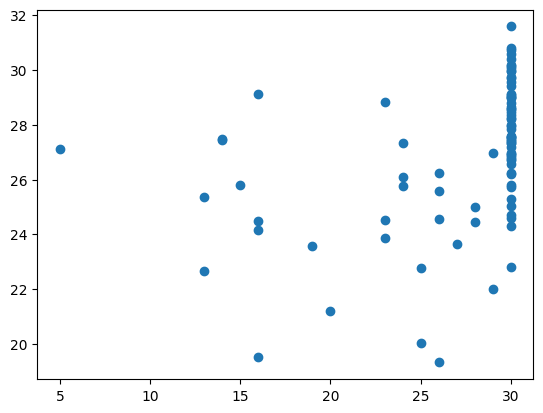

In [9]:
import matplotlib.pyplot as plt
plt.scatter(WhisperForAudioClassification_v2_15k_truth, WhisperForAudioClassification_v2_15k_hyps)
# plt.plot(list(range(len(fivefolds_1_truth))), fivefolds_1_hyps)
plt.show()

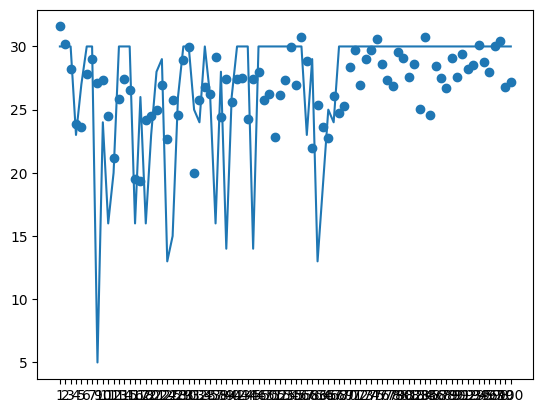

In [10]:
import matplotlib.pyplot as plt
plt.scatter(WhisperForAudioClassification_v2_15k_name, WhisperForAudioClassification_v2_15k_hyps)
plt.plot(WhisperForAudioClassification_v2_15k_name, WhisperForAudioClassification_v2_15k_truth)
plt.show()

<Axes: >

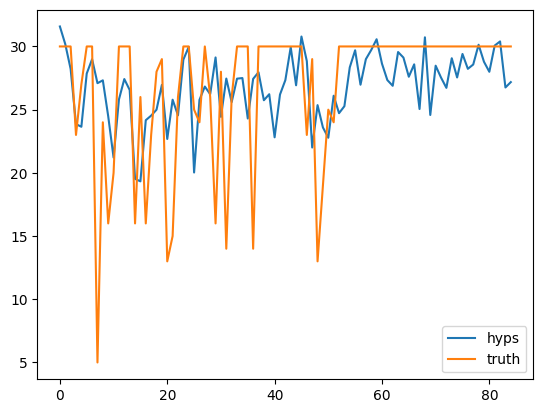

In [11]:
WhisperForAudioClassification_v2_15k_noname = WhisperForAudioClassification_v2_15k
WhisperForAudioClassification_v2_15k_noname = WhisperForAudioClassification_v2_15k_noname.drop(['name'], axis=1)
WhisperForAudioClassification_v2_15k_noname.plot()

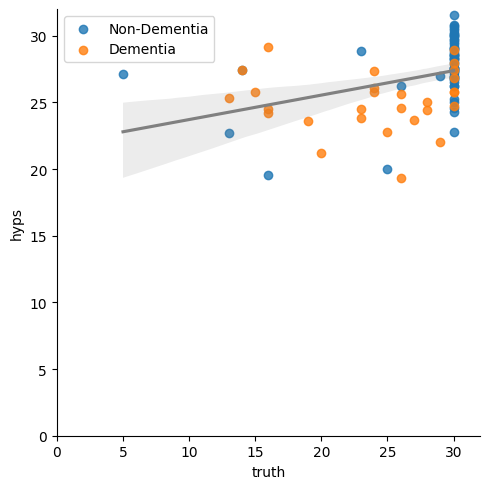

In [12]:
import seaborn as sns
from scipy import stats

# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(WhisperForAudioClassification_v2_15k['truth'],WhisperForAudioClassification_v2_15k['hyps'])

# Use lmplot to plot scatter points
sns.lmplot(x='truth', y='hyps', hue='label', data=WhisperForAudioClassification_v2_15k, fit_reg=False, legend=False)

# Use regplot to plot the regression line and use line_kws to set line label for legend
# ax = sns.regplot(x="truth", y="hyps", data=WhisperForAudioClassification_v2_15k, scatter_kws={"zorder":-1},
# line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept), "color": "green"})
ax = sns.regplot(x="truth", y="hyps", data=WhisperForAudioClassification_v2_15k, scatter_kws={"zorder":-1, "color": "white"}, line_kws={"color": "gray"})

# plot legend
ax.legend()
ax.set_xlim(0, 32)
ax.set_ylim(0, 32)

# save the plot as PNG file
plt.savefig("MMSE_v2.png")
plt.savefig("MMSE_v2.jpg")

<Axes: xlabel='truth', ylabel='hyps'>

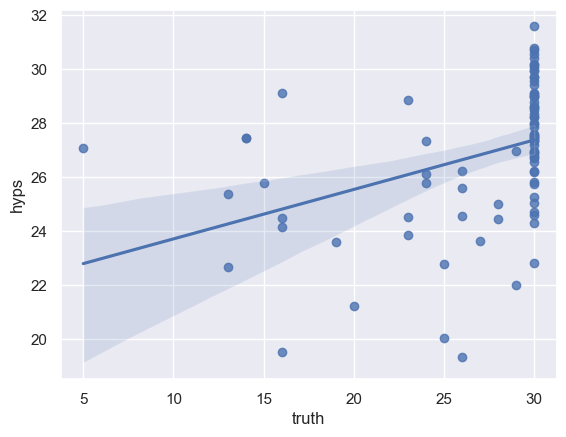

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(color_codes=True)
tips = sns.load_dataset("tips")
sns.regplot(x="truth", y="hyps", data=WhisperForAudioClassification_v2_15k)

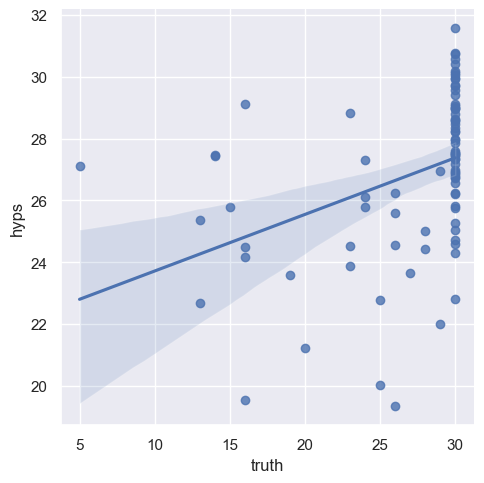

In [14]:
sns.lmplot(x="truth", y="hyps", data=WhisperForAudioClassification_v2_15k)

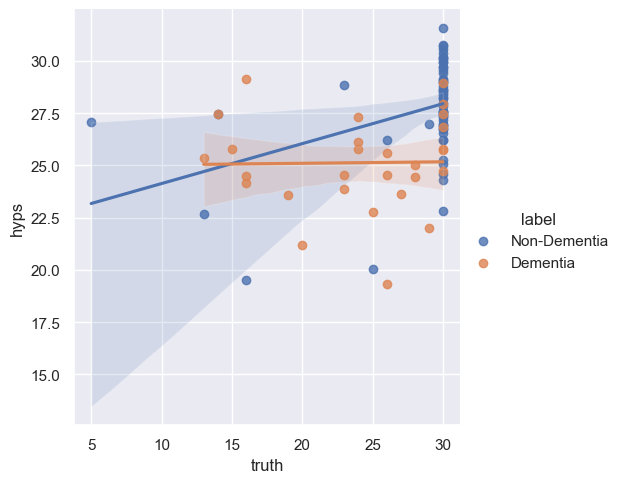

In [15]:
sns.lmplot(x="truth", y="hyps", hue="label", data=WhisperForAudioClassification_v2_15k)

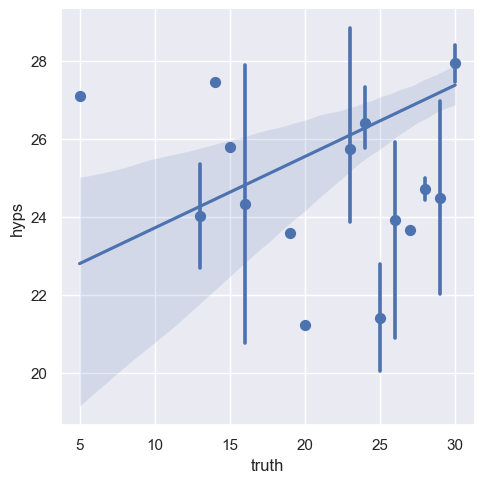

In [16]:
sns.lmplot(x="truth", y="hyps", data=WhisperForAudioClassification_v2_15k, x_estimator=np.mean);

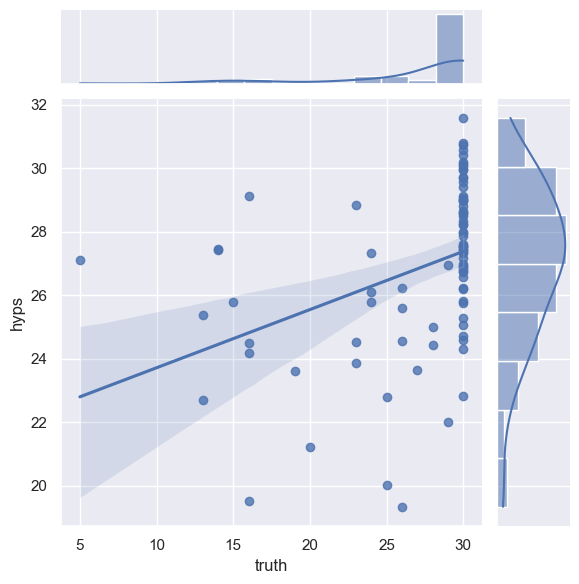

In [17]:
sns.jointplot(x="truth", y="hyps", data=WhisperForAudioClassification_v2_15k, kind="reg")

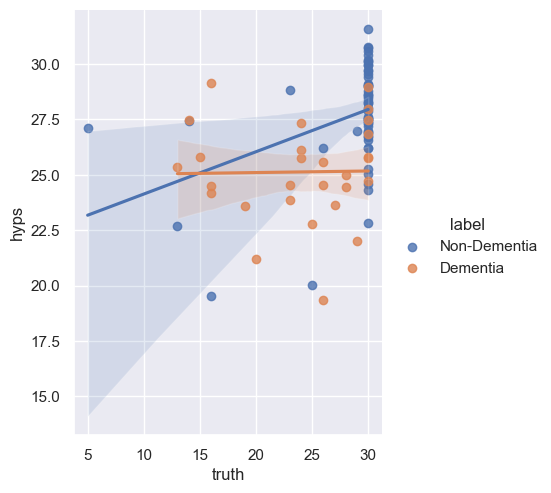

In [18]:
sns.pairplot(WhisperForAudioClassification_v2_15k, x_vars="truth", y_vars="hyps", hue="label", height=5, aspect=.8, kind="reg")

In [19]:
# decision_tree_result = pd.DataFrame()
train_mae = []
test_mae = []

fivefolds1_steps = pd.read_csv('whisper-WhisperForAudioClassification-v2-15k1.csv')
fivefolds1_hyps = fivefolds1_steps['hyps'].tolist()
fivefolds1_truth = [int(i) for i in fivefolds1_steps['truth'].tolist()]
fivefolds1_name = [str(i).replace("CTT", "") for i in fivefolds1_steps['name'].tolist()]
print('evs: ', metrics.explained_variance_score(fivefolds1_truth, fivefolds1_hyps))
print('mae: ', metrics.mean_absolute_error(fivefolds1_truth, fivefolds1_hyps))
print('mse: ', metrics.mean_squared_error(fivefolds1_truth, fivefolds1_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(fivefolds1_truth, fivefolds1_hyps)))
print('r2: ', metrics.r2_score(fivefolds1_truth, fivefolds1_hyps))
test_mae1 = metrics.mean_absolute_error(fivefolds1_truth, fivefolds1_hyps)
test_mae.append(test_mae1)
train_mae1 = (total_mae*len(WhisperForAudioClassification_v2_15k_name) - test_mae1*len(fivefolds1_name)) / (len(WhisperForAudioClassification_v2_15k_name) - len(fivefolds1_name))
train_mae.append(train_mae1)

fivefolds2_steps = pd.read_csv('whisper-WhisperForAudioClassification-v2-15k2.csv')
fivefolds2_hyps = fivefolds2_steps['hyps'].tolist()
fivefolds2_truth = [int(i) for i in fivefolds2_steps['truth'].tolist()]
fivefolds2_name = [str(i).replace("CTT", "") for i in fivefolds2_steps['name'].tolist()]
print('evs: ', metrics.explained_variance_score(fivefolds2_truth, fivefolds2_hyps))
print('mae: ', metrics.mean_absolute_error(fivefolds2_truth, fivefolds2_hyps))
print('mse: ', metrics.mean_squared_error(fivefolds2_truth, fivefolds2_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(fivefolds2_truth, fivefolds2_hyps)))
print('r2: ', metrics.r2_score(fivefolds2_truth, fivefolds2_hyps))
test_mae2 = metrics.mean_absolute_error(fivefolds2_truth, fivefolds2_hyps)
test_mae.append(test_mae2)
train_mae2 = (total_mae*len(WhisperForAudioClassification_v2_15k_name) - test_mae1*len(fivefolds2_name)) / (len(WhisperForAudioClassification_v2_15k_name) - len(fivefolds2_name))
train_mae.append(train_mae2)

fivefolds3_steps = pd.read_csv('whisper-WhisperForAudioClassification-v2-15k3.csv')
fivefolds3_hyps = fivefolds3_steps['hyps'].tolist()
fivefolds3_truth = [int(i) for i in fivefolds3_steps['truth'].tolist()]
fivefolds3_name = [str(i).replace("CTT", "") for i in fivefolds3_steps['name'].tolist()]
print('evs: ', metrics.explained_variance_score(fivefolds3_truth, fivefolds3_hyps))
print('mae: ', metrics.mean_absolute_error(fivefolds3_truth, fivefolds3_hyps))
print('mse: ', metrics.mean_squared_error(fivefolds3_truth, fivefolds3_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(fivefolds3_truth, fivefolds3_hyps)))
print('r2: ', metrics.r2_score(fivefolds3_truth, fivefolds3_hyps))
test_mae3 = metrics.mean_absolute_error(fivefolds3_truth, fivefolds3_hyps)
test_mae.append(test_mae3)
train_mae3 = (total_mae*len(WhisperForAudioClassification_v2_15k_name) - test_mae1*len(fivefolds3_name)) / (len(WhisperForAudioClassification_v2_15k_name) - len(fivefolds3_name))
train_mae.append(train_mae3)

fivefolds4_steps = pd.read_csv('whisper-WhisperForAudioClassification-v2-15k4.csv')
fivefolds4_hyps = fivefolds4_steps['hyps'].tolist()
fivefolds4_truth = [int(i) for i in fivefolds4_steps['truth'].tolist()]
fivefolds4_name = [str(i).replace("CTT", "") for i in fivefolds4_steps['name'].tolist()]
print('evs: ', metrics.explained_variance_score(fivefolds4_truth, fivefolds4_hyps))
print('mae: ', metrics.mean_absolute_error(fivefolds4_truth, fivefolds4_hyps))
print('mse: ', metrics.mean_squared_error(fivefolds4_truth, fivefolds4_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(fivefolds4_truth, fivefolds4_hyps)))
print('r2: ', metrics.r2_score(fivefolds4_truth, fivefolds4_hyps))
test_mae4 = metrics.mean_absolute_error(fivefolds4_truth, fivefolds4_hyps)
test_mae.append(test_mae4)
train_mae4 = (total_mae*len(WhisperForAudioClassification_v2_15k_name) - test_mae1*len(fivefolds4_name)) / (len(WhisperForAudioClassification_v2_15k_name) - len(fivefolds4_name))
train_mae.append(train_mae4)

fivefolds5_steps = pd.read_csv('whisper-WhisperForAudioClassification-v2-15k5.csv')
fivefolds5_hyps = fivefolds5_steps['hyps'].tolist()
fivefolds5_truth = [int(i) for i in fivefolds5_steps['truth'].tolist()]
fivefolds5_name = [str(i).replace("CTT", "") for i in fivefolds5_steps['name'].tolist()]
print('evs: ', metrics.explained_variance_score(fivefolds5_truth, fivefolds5_hyps))
print('mae: ', metrics.mean_absolute_error(fivefolds5_truth, fivefolds5_hyps))
print('mse: ', metrics.mean_squared_error(fivefolds5_truth, fivefolds5_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(fivefolds5_truth, fivefolds5_hyps)))
print('r2: ', metrics.r2_score(fivefolds5_truth, fivefolds5_hyps))
test_mae5 = metrics.mean_absolute_error(fivefolds5_truth, fivefolds5_hyps)
test_mae.append(test_mae5)
train_mae5 = (total_mae*len(WhisperForAudioClassification_v2_15k_name) - test_mae1*len(fivefolds5_name)) / (len(WhisperForAudioClassification_v2_15k_name) - len(fivefolds5_name))
train_mae.append(train_mae5)

array = np.stack((train_mae, test_mae), axis=1)
decision_tree_result = pd.DataFrame(array,  columns = ['train_mae', 'test_mae'])
# decision_tree_result = pd.DataFrame(test_mae,  columns = ['test_mae'])
decision_tree_result

evs:  0.17212905827518943
mae:  3.4994810003983345
mse:  38.96463980295467
rmse:  6.2421662748564035
r2:  0.12501648613668592
evs:  0.12841629251081432
mae:  4.706109152899848
mse:  52.060647801967804
rmse:  7.215306493972921
r2:  -0.20277024300039725
evs:  -0.0017412756167287657
mae:  2.54535473094267
mse:  17.038437288938013
rmse:  4.127764199774257
r2:  -0.13825898670898895
evs:  0.060081216905496504
mae:  3.4162772683536304
mse:  53.61166971539933
rmse:  7.321999024542364
r2:  -0.09218754742354474
evs:  0.31345036095581114
mae:  2.596181154251098
mse:  16.5775047091115
rmse:  4.071548195602197
r2:  0.2826502357111994


,train_mae,test_mae
0,3.467110,3.499481
1,3.467593,4.706109
2,3.468062,2.545355
3,3.468062,3.416277
4,3.468517,2.596181


In [20]:
# Grouped Bar Chart for both training and validation data
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        '''Function to plot a grouped bar chart showing the training and validation
          results of the ML model in each fold after applying K-fold cross-validation.
         Parameters
         ----------
         x_label: str, 
            Name of the algorithm used for training e.g 'Decision Tree'
          
         y_label: str, 
            Name of metric being visualized e.g 'Accuracy'
         plot_title: str, 
            This is the title of the plot e.g 'Accuracy Plot'
         
         train_result: list, array
            This is the list containing either training precision, accuracy, or f1 score.
        
         val_result: list, array
            This is the list containing either validation precision, accuracy, or f1 score.
         Returns
         -------
         The function returns a Grouped Barchart showing the training and validation result
         in each fold.
        '''
        
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.0, 0.3)
        plt.bar(X_axis-0.2, train_data, 0.4, color='steelblue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='lightsteelblue', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

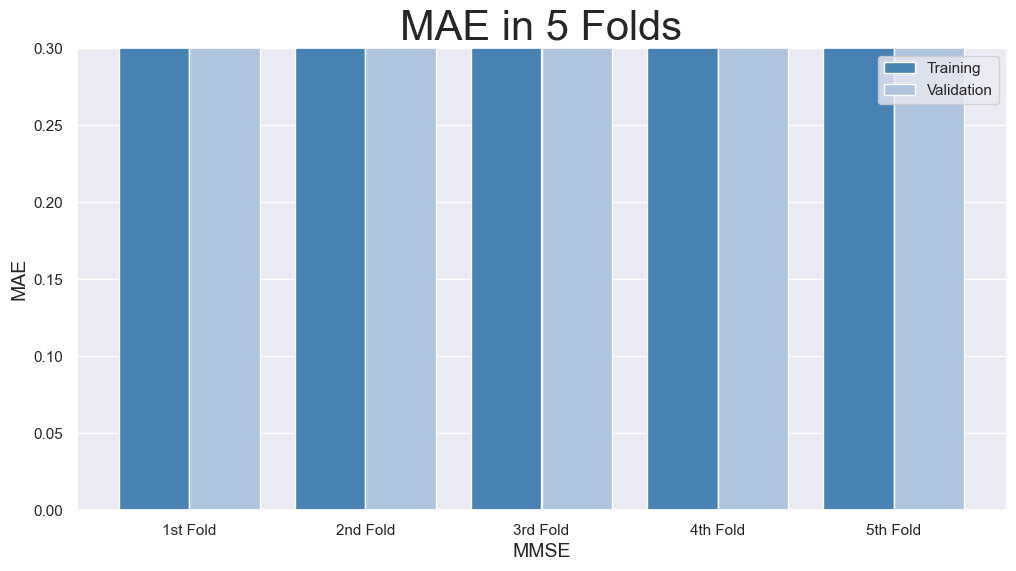

In [21]:
model_name = "MMSE"
plot_result(model_name,
            "MAE",
            "MAE in 5 Folds",
            decision_tree_result["train_mae"],
            decision_tree_result["test_mae"])

## BERT

In [4]:
bert_v2_15k = pd.read_csv('bert-v2-15k-r-final-2.csv')
# fivefolds_1k['result'] = np.where(fivefolds_1k['hyps'] >= 0.5,1,0)
# bert_v2_15k['name'] =  bert_v2_15k['name'].str.split('\\').str.get(-1)
# bert_v2_15k['name'] =  bert_v2_15k['name'].str.split('C').str.get(0).astype(int)
bert_v2_15k['name'] =  bert_v2_15k['name'].astype(int)
bert_v2_15k = bert_v2_15k.sort_values(by=['name'])
bert_v2_15k = bert_v2_15k.reset_index(drop=True)
bert_v2_15k['label'] = fivefolds_label['label']
bert_v2_15k.head(50)

,name,hyps,truth,ifcorrect,label
0,1,29.746660,30.0,False,Non-Dementia
1,2,29.931427,30.0,False,Non-Dementia
2,3,29.553886,30.0,False,Non-Dementia
3,4,26.115545,23.0,False,Dementia
4,5,28.909714,27.0,False,Dementia
5,6,28.027058,30.0,False,Non-Dementia
6,7,29.577873,30.0,False,Non-Dementia
7,9,27.021589,5.0,False,Non-Dementia
8,10,27.943213,24.0,False,Dementia
9,11,25.608740,16.0,False,Dementia


In [5]:
bert_v2_15k.tail(35)

,name,hyps,truth,ifcorrect,label
50,65,26.788010,25.0,False,Dementia
51,67,28.500702,24.0,False,Dementia
52,68,24.273045,30.0,False,Dementia
53,69,27.396873,30.0,False,Non-Dementia
54,70,30.794930,30.0,False,Non-Dementia
55,71,26.815462,30.0,False,Non-Dementia
56,72,29.423176,30.0,False,Non-Dementia
57,73,29.032421,30.0,False,Non-Dementia
58,74,30.489826,30.0,False,Non-Dementia
59,75,29.394495,30.0,False,Non-Dementia


In [6]:
bert_v2_15k_result = bert_v2_15k['ifcorrect'].tolist()
bert_v2_15k_hyps = bert_v2_15k['hyps'].tolist()
# fivefolds_1_truth = [int(i) for i in fivefolds_1k['truth'].tolist()]
bert_v2_15k_truth = bert_v2_15k['truth'].tolist()

In [8]:
bert_v2_15k_label = bert_v2_15k['label'].tolist()
bert_v2_15k_hyps = [float(i) for i in bert_v2_15k['hyps'].tolist()]
bert_v2_15k_truth = [float(i) for i in bert_v2_15k['truth'].tolist()]
bert_v2_15k_name = [str(i).replace("CTT", "") for i in bert_v2_15k['name'].tolist()]

In [9]:
# print(classification_report(fivefolds_1_truth, fivefolds_1_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_1_truth, fivefolds_1_result).ravel()
# print('sensitivuty: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_1_truth), np.array(fivefolds_1_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))

print('evs: ', metrics.explained_variance_score(bert_v2_15k_truth, bert_v2_15k_hyps))
print('mae: ', metrics.mean_absolute_error(bert_v2_15k_truth, bert_v2_15k_hyps))
print('mse: ', metrics.mean_squared_error(bert_v2_15k_truth, bert_v2_15k_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(bert_v2_15k_truth, bert_v2_15k_hyps)))
print('r2: ', metrics.r2_score(bert_v2_15k_truth, bert_v2_15k_hyps))
total_mae = metrics.mean_absolute_error(bert_v2_15k_truth, bert_v2_15k_hyps)

evs:  0.26074998700026486
mae:  2.769455831191119
mse:  23.70145483853065
rmse:  4.868413996213824
r2:  0.21179156751305417


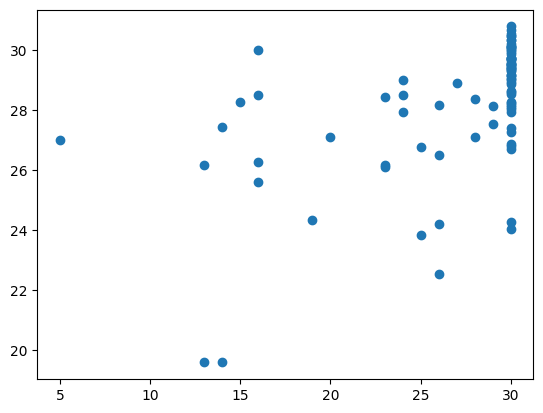

In [10]:
import matplotlib.pyplot as plt
plt.scatter(bert_v2_15k_truth, bert_v2_15k_hyps)
# plt.plot(list(range(len(fivefolds_1_truth))), fivefolds_1_hyps)
plt.show()

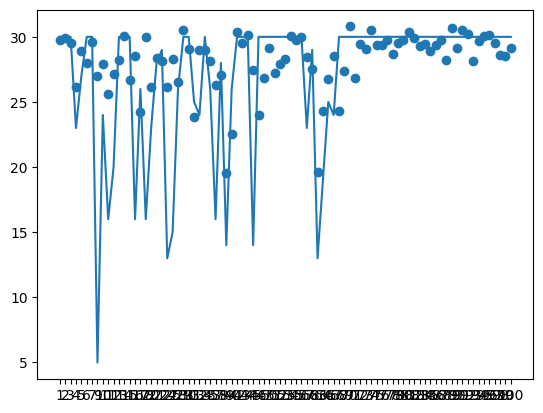

In [11]:
import matplotlib.pyplot as plt
plt.scatter(bert_v2_15k_name, bert_v2_15k_hyps)
plt.plot(bert_v2_15k_name, bert_v2_15k_truth)
plt.show()

<Axes: >

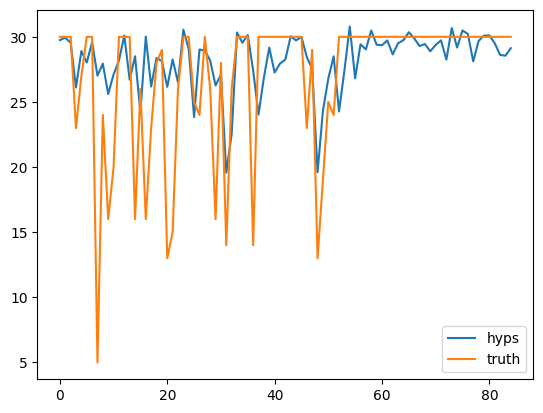

In [12]:
bert_v2_15k_noname = bert_v2_15k
bert_v2_15k_noname = bert_v2_15k_noname.drop(['name'], axis=1)
bert_v2_15k_noname.plot()

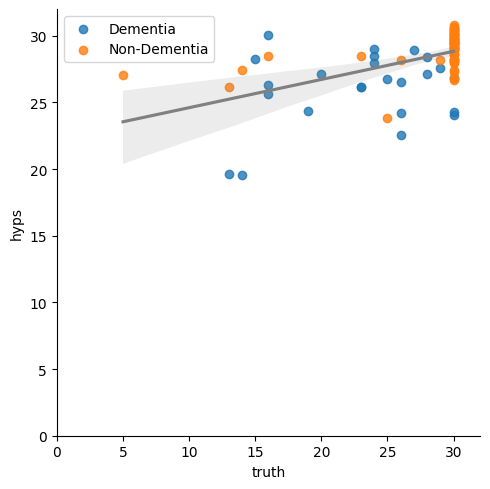

In [13]:
import seaborn as sns
from scipy import stats

# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(bert_v2_15k['truth'],bert_v2_15k['hyps'])

# Use lmplot to plot scatter points
sns.lmplot(x='truth', y='hyps', hue='label', data=bert_v2_15k, fit_reg=False, legend=False, hue_order=['Dementia', 'Non-Dementia'])

# Use regplot to plot the regression line and use line_kws to set line label for legend
# ax = sns.regplot(x="truth", y="hyps", data=bert_v2_15k, scatter_kws={"zorder":-1},
# line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept), "color": "green"})
ax = sns.regplot(x="truth", y="hyps", data=bert_v2_15k, scatter_kws={"zorder":-1, "color": "white"}, line_kws={"color": "gray"})

# plot legend
ax.legend()
ax.set_xlim(0, 32)
ax.set_ylim(0, 32)

# save the plot as PNG file
plt.savefig("MMSE_v2_bert.png")
plt.savefig("MMSE_v2_bert.jpg")

<Axes: xlabel='truth', ylabel='hyps'>

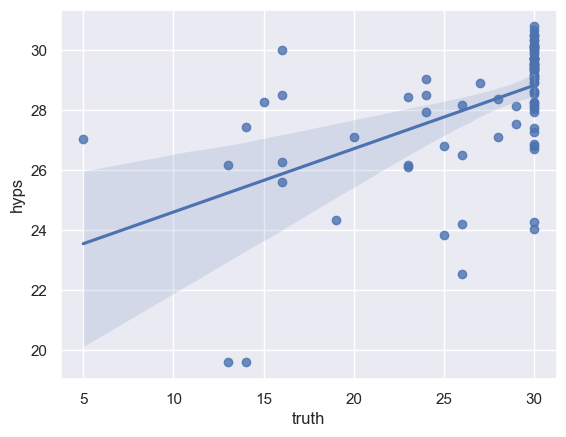

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(color_codes=True)
tips = sns.load_dataset("tips")
sns.regplot(x="truth", y="hyps", data=bert_v2_15k)

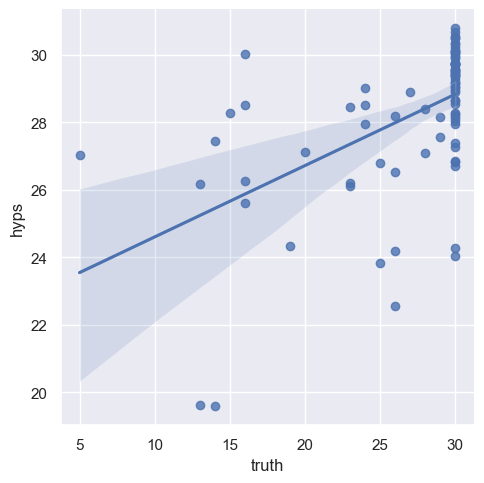

In [15]:
sns.lmplot(x="truth", y="hyps", data=bert_v2_15k)

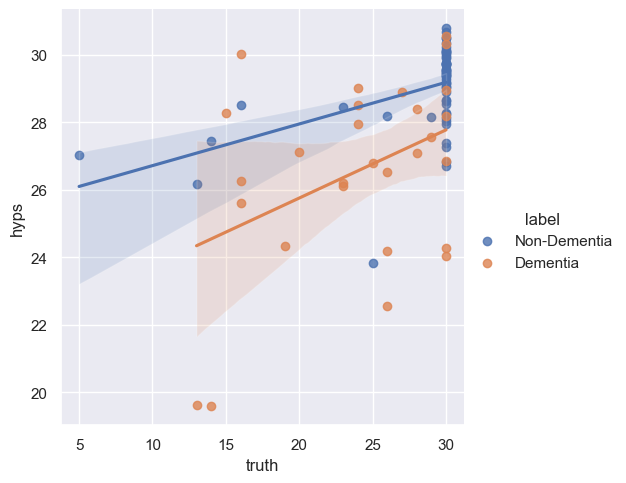

In [ ]:
sns.lmplot(x="truth", y="hyps", hue="label", data=bert_v2_15k)

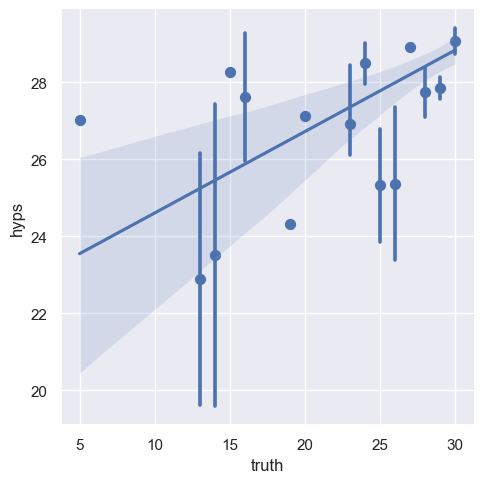

In [ ]:
sns.lmplot(x="truth", y="hyps", data=bert_v2_15k, x_estimator=np.mean);

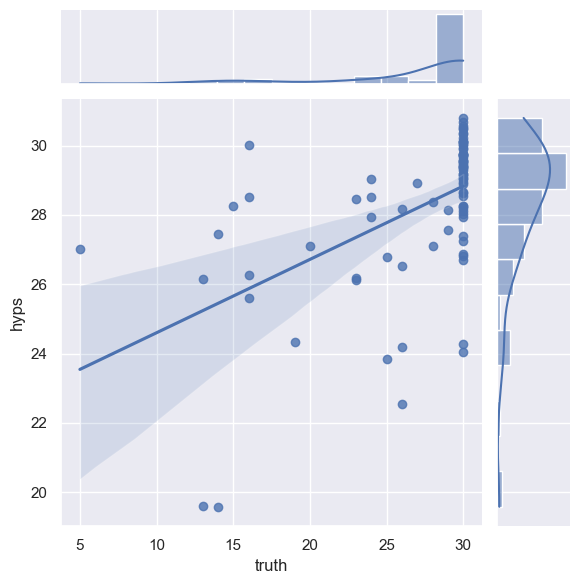

In [ ]:
sns.jointplot(x="truth", y="hyps", data=bert_v2_15k, kind="reg")

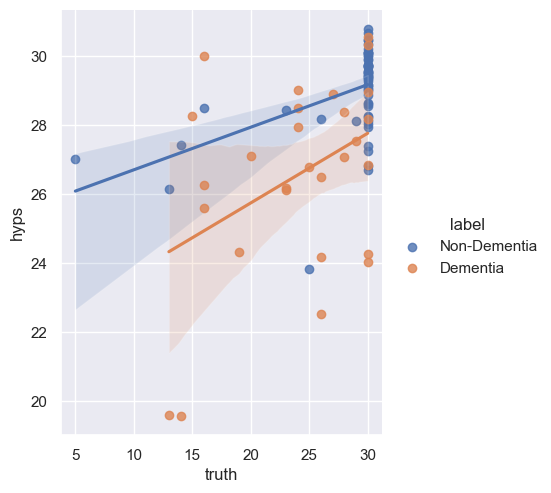

In [ ]:
sns.pairplot(bert_v2_15k, x_vars="truth", y_vars="hyps", hue="label", height=5, aspect=.8, kind="reg")

In [ ]:
# decision_tree_result = pd.DataFrame()
train_mae = []
test_mae = []

fivefolds1_steps = pd.read_csv('bert-v2-15k1.csv')
fivefolds1_hyps = fivefolds1_steps['hyps'].tolist()
fivefolds1_truth = [int(i) for i in fivefolds1_steps['truth'].tolist()]
fivefolds1_name = [str(i).replace("CTT", "") for i in fivefolds1_steps['name'].tolist()]
print('evs: ', metrics.explained_variance_score(fivefolds1_truth, fivefolds1_hyps))
print('mae: ', metrics.mean_absolute_error(fivefolds1_truth, fivefolds1_hyps))
print('mse: ', metrics.mean_squared_error(fivefolds1_truth, fivefolds1_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(fivefolds1_truth, fivefolds1_hyps)))
print('r2: ', metrics.r2_score(fivefolds1_truth, fivefolds1_hyps))
test_mae1 = metrics.mean_absolute_error(fivefolds1_truth, fivefolds1_hyps)
test_mae.append(test_mae1)
train_mae1 = (total_mae*len(bert_v2_15k_name) - test_mae1*len(fivefolds1_name)) / (len(bert_v2_15k_name) - len(fivefolds1_name))
train_mae.append(train_mae1)

fivefolds2_steps = pd.read_csv('bert-v2-15k2.csv')
fivefolds2_hyps = fivefolds2_steps['hyps'].tolist()
fivefolds2_truth = [int(i) for i in fivefolds2_steps['truth'].tolist()]
fivefolds2_name = [str(i).replace("CTT", "") for i in fivefolds2_steps['name'].tolist()]
print('evs: ', metrics.explained_variance_score(fivefolds2_truth, fivefolds2_hyps))
print('mae: ', metrics.mean_absolute_error(fivefolds2_truth, fivefolds2_hyps))
print('mse: ', metrics.mean_squared_error(fivefolds2_truth, fivefolds2_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(fivefolds2_truth, fivefolds2_hyps)))
print('r2: ', metrics.r2_score(fivefolds2_truth, fivefolds2_hyps))
test_mae2 = metrics.mean_absolute_error(fivefolds2_truth, fivefolds2_hyps)
test_mae.append(test_mae2)
train_mae2 = (total_mae*len(bert_v2_15k_name) - test_mae1*len(fivefolds2_name)) / (len(bert_v2_15k_name) - len(fivefolds2_name))
train_mae.append(train_mae2)

fivefolds3_steps = pd.read_csv('bert-v2-15k3.csv')
fivefolds3_hyps = fivefolds3_steps['hyps'].tolist()
fivefolds3_truth = [int(i) for i in fivefolds3_steps['truth'].tolist()]
fivefolds3_name = [str(i).replace("CTT", "") for i in fivefolds3_steps['name'].tolist()]
print('evs: ', metrics.explained_variance_score(fivefolds3_truth, fivefolds3_hyps))
print('mae: ', metrics.mean_absolute_error(fivefolds3_truth, fivefolds3_hyps))
print('mse: ', metrics.mean_squared_error(fivefolds3_truth, fivefolds3_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(fivefolds3_truth, fivefolds3_hyps)))
print('r2: ', metrics.r2_score(fivefolds3_truth, fivefolds3_hyps))
test_mae3 = metrics.mean_absolute_error(fivefolds3_truth, fivefolds3_hyps)
test_mae.append(test_mae3)
train_mae3 = (total_mae*len(bert_v2_15k_name) - test_mae1*len(fivefolds3_name)) / (len(bert_v2_15k_name) - len(fivefolds3_name))
train_mae.append(train_mae3)

fivefolds4_steps = pd.read_csv('bert-v2-15k4.csv')
fivefolds4_hyps = fivefolds4_steps['hyps'].tolist()
fivefolds4_truth = [int(i) for i in fivefolds4_steps['truth'].tolist()]
fivefolds4_name = [str(i).replace("CTT", "") for i in fivefolds4_steps['name'].tolist()]
print('evs: ', metrics.explained_variance_score(fivefolds4_truth, fivefolds4_hyps))
print('mae: ', metrics.mean_absolute_error(fivefolds4_truth, fivefolds4_hyps))
print('mse: ', metrics.mean_squared_error(fivefolds4_truth, fivefolds4_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(fivefolds4_truth, fivefolds4_hyps)))
print('r2: ', metrics.r2_score(fivefolds4_truth, fivefolds4_hyps))
test_mae4 = metrics.mean_absolute_error(fivefolds4_truth, fivefolds4_hyps)
test_mae.append(test_mae4)
train_mae4 = (total_mae*len(bert_v2_15k_name) - test_mae1*len(fivefolds4_name)) / (len(bert_v2_15k_name) - len(fivefolds4_name))
train_mae.append(train_mae4)

fivefolds5_steps = pd.read_csv('bert-v2-15k5.csv')
fivefolds5_hyps = fivefolds5_steps['hyps'].tolist()
fivefolds5_truth = [int(i) for i in fivefolds5_steps['truth'].tolist()]
fivefolds5_name = [str(i).replace("CTT", "") for i in fivefolds5_steps['name'].tolist()]
print('evs: ', metrics.explained_variance_score(fivefolds5_truth, fivefolds5_hyps))
print('mae: ', metrics.mean_absolute_error(fivefolds5_truth, fivefolds5_hyps))
print('mse: ', metrics.mean_squared_error(fivefolds5_truth, fivefolds5_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(fivefolds5_truth, fivefolds5_hyps)))
print('r2: ', metrics.r2_score(fivefolds5_truth, fivefolds5_hyps))
test_mae5 = metrics.mean_absolute_error(fivefolds5_truth, fivefolds5_hyps)
test_mae.append(test_mae5)
train_mae5 = (total_mae*len(bert_v2_15k_name) - test_mae1*len(fivefolds5_name)) / (len(bert_v2_15k_name) - len(fivefolds5_name))
train_mae.append(train_mae5)

array = np.stack((train_mae, test_mae), axis=1)
decision_tree_result = pd.DataFrame(array,  columns = ['train_mae', 'test_mae'])
# decision_tree_result = pd.DataFrame(test_mae,  columns = ['test_mae'])
decision_tree_result

evs:  -0.024814028437116775
mae:  4.495610136734812
mse:  45.699126117228644
rmse:  6.760112877550836
r2:  -0.026212025896960922
evs:  0.2137045534278743
mae:  4.5494908226860895
mse:  42.71856790556275
rmse:  6.53594430098381
r2:  0.013062179021510856
evs:  0.008888139004202378
mae:  2.4777226167566644
mse:  15.062120555620133
rmse:  3.8809947894348085
r2:  -0.006230430091127781
evs:  0.18710807008983577
mae:  3.7849604662726914
mse:  47.61315274296944
rmse:  6.900228455853432
r2:  0.03001542769503962
evs:  0.31671008597306327
mae:  2.248449325561524
mse:  17.157461471082577
rmse:  4.142156620781327
r2:  0.2575540675123158


,train_mae,test_mae
0,2.272533,4.495610
1,2.305713,4.549491
2,2.337917,2.477723
3,2.337917,3.784960
4,2.369188,2.248449


In [ ]:
# Grouped Bar Chart for both training and validation data
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        '''Function to plot a grouped bar chart showing the training and validation
          results of the ML model in each fold after applying K-fold cross-validation.
         Parameters
         ----------
         x_label: str, 
            Name of the algorithm used for training e.g 'Decision Tree'
          
         y_label: str, 
            Name of metric being visualized e.g 'Accuracy'
         plot_title: str, 
            This is the title of the plot e.g 'Accuracy Plot'
         
         train_result: list, array
            This is the list containing either training precision, accuracy, or f1 score.
        
         val_result: list, array
            This is the list containing either validation precision, accuracy, or f1 score.
         Returns
         -------
         The function returns a Grouped Barchart showing the training and validation result
         in each fold.
        '''
        
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.0, 0.3)
        plt.bar(X_axis-0.2, train_data, 0.4, color='steelblue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='lightsteelblue', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

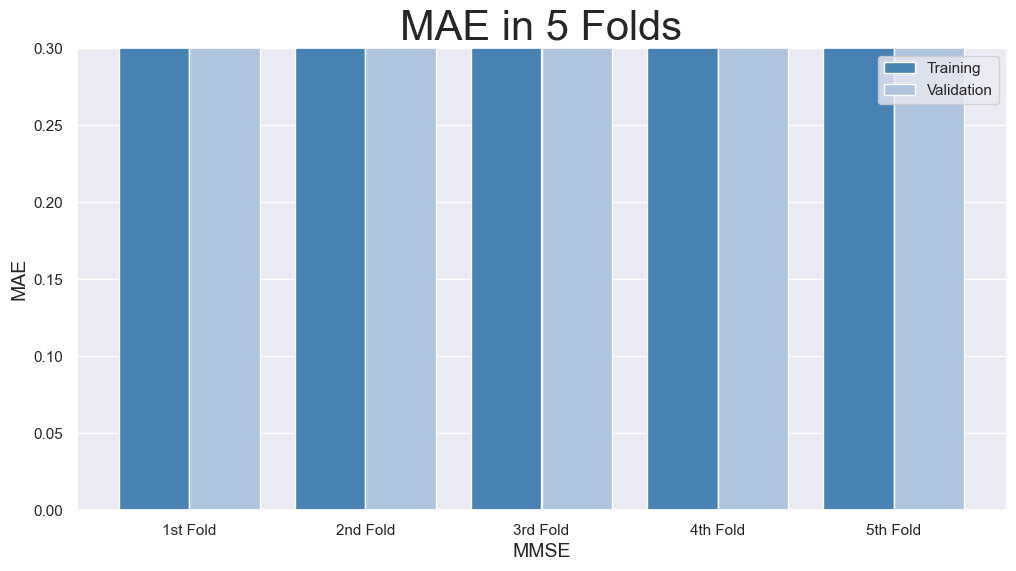

In [ ]:
model_name = "MMSE"
plot_result(model_name,
            "MAE",
            "MAE in 5 Folds",
            decision_tree_result["train_mae"],
            decision_tree_result["test_mae"])

## Combine

In [4]:
whisper_v2_15k = pd.read_csv('whisper-v2-15k-r-a-final-fix.csv')
bert_v2_15k = pd.read_csv('bert-v2-15k-r-final-2.csv')
# fivefolds_1k['result'] = np.where(fivefolds_1k['hyps'] >= 0.5,1,0)
# bert_v2_15k['name'] =  bert_v2_15k['name'].str.split('\\').str.get(-1)
# bert_v2_15k['name'] =  bert_v2_15k['name'].str.split('C').str.get(0).astype(int)
combine_v2_15k = pd.DataFrame()
bert_v2_15k['name'] =  bert_v2_15k['name'].astype(int)
bert_v2_15k = bert_v2_15k.sort_values(by=['name'])
bert_v2_15k = bert_v2_15k.reset_index(drop=True)
whisper_v2_15k['name'] =  whisper_v2_15k['name'].str.split('\\').str.get(-1)
whisper_v2_15k['name'] =  whisper_v2_15k['name'].str.split('C').str.get(0).astype(int)
whisper_v2_15k = whisper_v2_15k.sort_values(by=['name'])
whisper_v2_15k = whisper_v2_15k.reset_index(drop=True)
print(bert_v2_15k)
print(whisper_v2_15k)
combine_v2_15k['name'] = bert_v2_15k['name']
combine_v2_15k['hyps'] =  (bert_v2_15k['hyps']+whisper_v2_15k['hyps'])/2
combine_v2_15k['truth'] = bert_v2_15k['truth']
combine_v2_15k['ifcorrect'] = bert_v2_15k['ifcorrect']
combine_v2_15k['label'] = fivefolds_label['label']
combine_v2_15k.to_csv("combine_v2_15k.csv")
combine_v2_15k.head(50)

    name       hyps  truth  ifcorrect
0      1  29.746660   30.0      False
1      2  29.931427   30.0      False
2      3  29.553886   30.0      False
3      4  26.115545   23.0      False
4      5  28.909714   27.0      False
..   ...        ...    ...        ...
80    96  30.103521   30.0      False
81    97  29.514227   30.0      False
82    98  28.618397   30.0      False
83    99  28.550358   30.0      False
84   100  29.128319   30.0      False

[85 rows x 4 columns]
    name       hyps  truth  ifcorrect
0      1  31.580307   30.0      False
1      2  30.186377   30.0      False
2      3  28.222284   30.0      False
3      4  23.857574   23.0      False
4      5  23.647667   27.0      False
..   ...        ...    ...        ...
80    96  27.995872   30.0      False
81    97  30.069708   30.0      False
82    98  30.398106   30.0      False
83    99  26.755064   30.0      False
84   100  27.179972   30.0      False

[85 rows x 4 columns]


In [5]:
combine_v2_15k.tail(35)

,name,hyps,truth,ifcorrect,label
50,65,26.788010,25.0,False,Dementia
51,67,28.500702,24.0,False,Dementia
52,68,24.273045,30.0,False,Dementia
53,69,27.396873,30.0,False,Non-Dementia
54,70,30.794930,30.0,False,Non-Dementia
55,71,26.815462,30.0,False,Non-Dementia
56,72,29.423176,30.0,False,Non-Dementia
57,73,29.032421,30.0,False,Non-Dementia
58,74,30.489826,30.0,False,Non-Dementia
59,75,29.394495,30.0,False,Non-Dementia


In [6]:
combine_v2_15k_result = combine_v2_15k['ifcorrect'].tolist()
combine_v2_15k_hyps = combine_v2_15k['hyps'].tolist()
# fivefolds_1_truth = [int(i) for i in fivefolds_1k['truth'].tolist()]
combine_v2_15k_truth = combine_v2_15k['truth'].tolist()

In [7]:
combine_v2_15k_label = combine_v2_15k['label'].tolist()
combine_v2_15k_hyps = [float(i) for i in combine_v2_15k['hyps'].tolist()]
combine_v2_15k_truth = [float(i) for i in combine_v2_15k['truth'].tolist()]
combine_v2_15k_name = [str(i).replace("CTT", "") for i in combine_v2_15k['name'].tolist()]

In [8]:
# print(classification_report(fivefolds_1_truth, fivefolds_1_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_1_truth, fivefolds_1_result).ravel()
# print('sensitivuty: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_1_truth), np.array(fivefolds_1_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))

print('evs: ', metrics.explained_variance_score(combine_v2_15k_truth, combine_v2_15k_hyps))
print('mae: ', metrics.mean_absolute_error(combine_v2_15k_truth, combine_v2_15k_hyps))
print('mse: ', metrics.mean_squared_error(combine_v2_15k_truth, combine_v2_15k_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(combine_v2_15k_truth, combine_v2_15k_hyps)))
print('r2: ', metrics.r2_score(bert_v2_15k_truth, combine_v2_15k_hyps))
total_mae = metrics.mean_absolute_error(combine_v2_15k_truth, combine_v2_15k_hyps)

evs:  0.26074998700026486
mae:  2.769455831191119
mse:  23.70145483853065
rmse:  4.868413996213824
r2:  0.21179156751305417


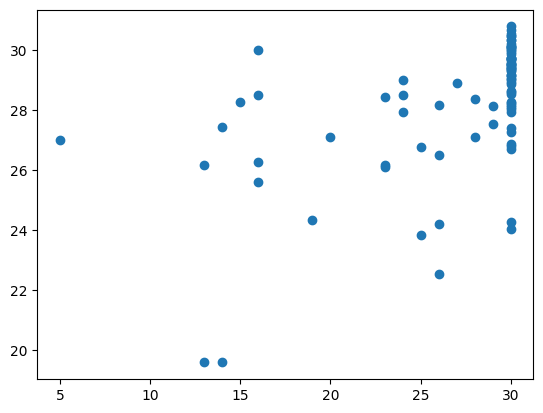

In [9]:
import matplotlib.pyplot as plt
plt.scatter(combine_v2_15k_truth, combine_v2_15k_hyps)
# plt.plot(list(range(len(fivefolds_1_truth))), fivefolds_1_hyps)
plt.show()

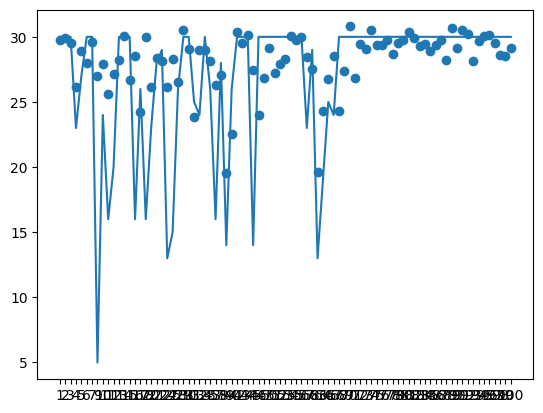

In [10]:
import matplotlib.pyplot as plt
plt.scatter(combine_v2_15kname, combine_v2_15k_hyps)
plt.plot(combine_v2_15k_name, combine_v2_15k_truth)
plt.show()

<Axes: >

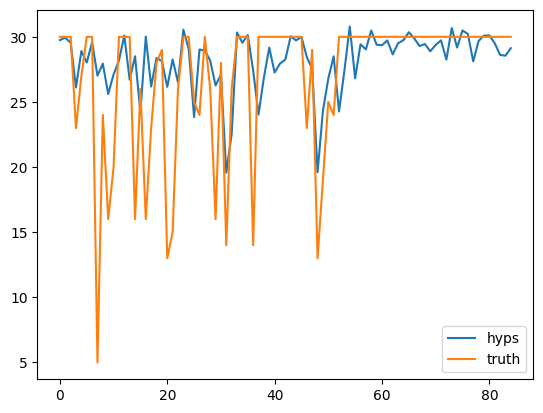

In [11]:
combine_v2_15k_noname = combine_v2_15k
combine_v2_15k_noname = combine_v2_15k_noname.drop(['name'], axis=1)
combine_v2_15k_noname.plot()

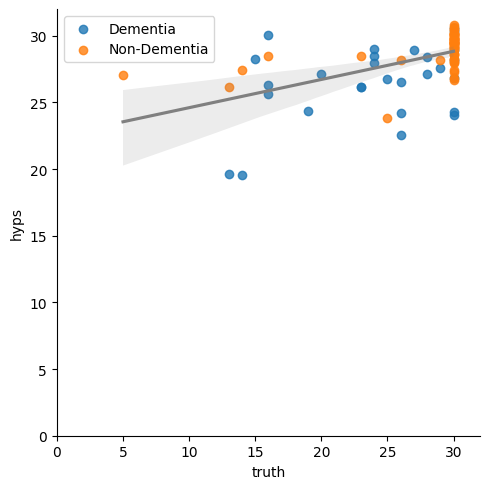

In [12]:
import seaborn as sns
from scipy import stats

# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(combine_v2_15k['truth'],combine_v2_15k['hyps'])

# Use lmplot to plot scatter points
sns.lmplot(x='truth', y='hyps', hue='label', data=combine_v2_15k, fit_reg=False, legend=False, hue_order=['Dementia', 'Non-Dementia'])

# Use regplot to plot the regression line and use line_kws to set line label for legend
# ax = sns.regplot(x="truth", y="hyps", data=combine_v2_15k, scatter_kws={"zorder":-1},
# line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept), "color": "green"})
ax = sns.regplot(x="truth", y="hyps", data=combine_v2_15k, scatter_kws={"zorder":-1, "color": "white"}, line_kws={"color": "gray"})

# plot legend
ax.legend()
ax.set_xlim(0, 32)
ax.set_ylim(0, 32)

# save the plot as PNG file
plt.savefig("MMSE_v2_combine.png")
plt.savefig("MMSE_v2_combine.jpg")

<Axes: xlabel='truth', ylabel='hyps'>

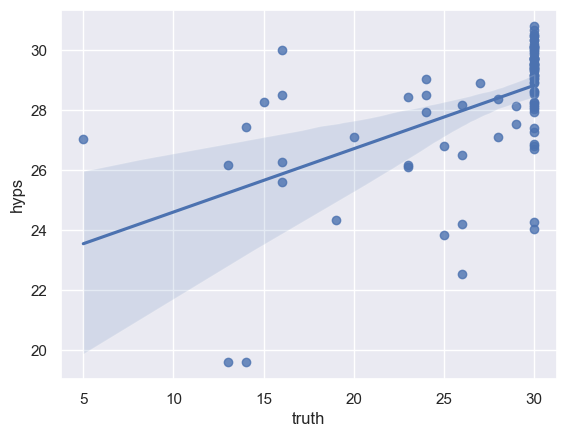

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(color_codes=True)
tips = sns.load_dataset("tips")
sns.regplot(x="truth", y="hyps", data=combine_v2_15k)

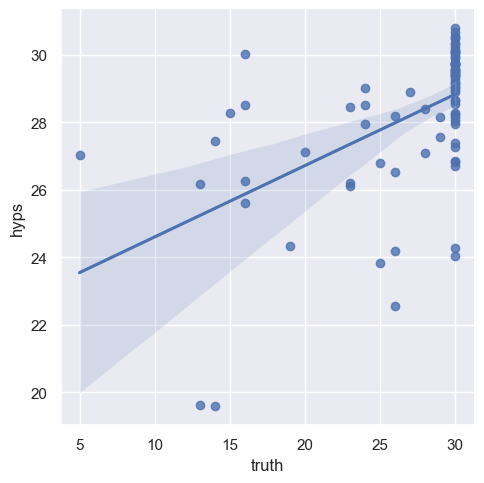

In [14]:
sns.lmplot(x="truth", y="hyps", data=combine_v2_15k)

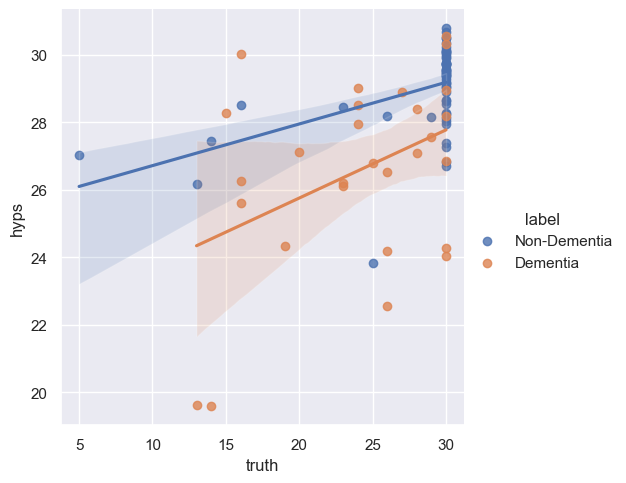

In [15]:
sns.lmplot(x="truth", y="hyps", hue="label", data=combine_v2_15k)

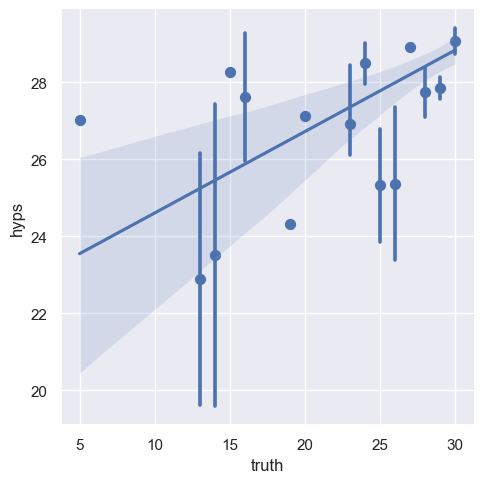

In [16]:
sns.lmplot(x="truth", y="hyps", data=combine_v2_15k, x_estimator=np.mean);

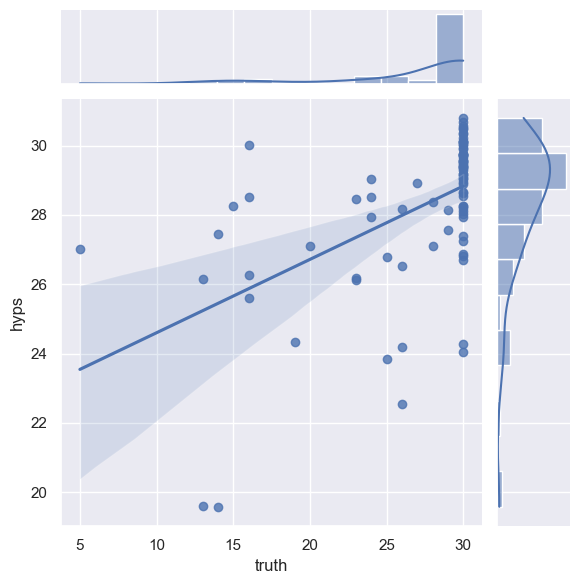

In [17]:
sns.jointplot(x="truth", y="hyps", data=combine_v2_15k, kind="reg")

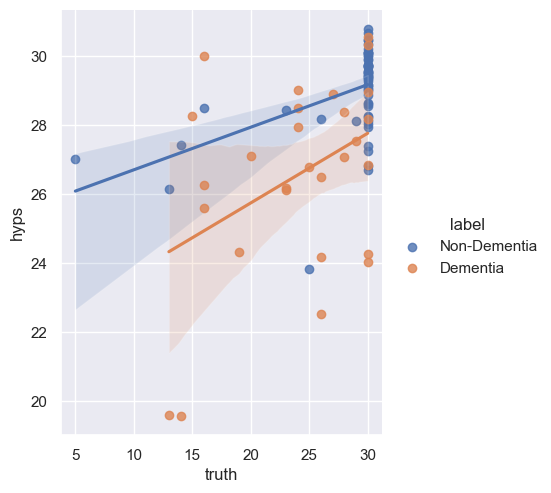

In [18]:
sns.pairplot(combine_v2_15k, x_vars="truth", y_vars="hyps", hue="label", height=5, aspect=.8, kind="reg")

In [19]:
# decision_tree_result = pd.DataFrame()
train_mae = []
test_mae = []

fivefolds1_steps = pd.read_csv('bert-v2-15k1.csv')
fivefolds1_hyps = fivefolds1_steps['hyps'].tolist()
fivefolds1_truth = [int(i) for i in fivefolds1_steps['truth'].tolist()]
fivefolds1_name = [str(i).replace("CTT", "") for i in fivefolds1_steps['name'].tolist()]
print('evs: ', metrics.explained_variance_score(fivefolds1_truth, fivefolds1_hyps))
print('mae: ', metrics.mean_absolute_error(fivefolds1_truth, fivefolds1_hyps))
print('mse: ', metrics.mean_squared_error(fivefolds1_truth, fivefolds1_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(fivefolds1_truth, fivefolds1_hyps)))
print('r2: ', metrics.r2_score(fivefolds1_truth, fivefolds1_hyps))
test_mae1 = metrics.mean_absolute_error(fivefolds1_truth, fivefolds1_hyps)
test_mae.append(test_mae1)
train_mae1 = (total_mae*len(combine_v2_15k_name) - test_mae1*len(fivefolds1_name)) / (len(combine_v2_15k_name) - len(fivefolds1_name))
train_mae.append(train_mae1)

fivefolds2_steps = pd.read_csv('bert-v2-15k2.csv')
fivefolds2_hyps = fivefolds2_steps['hyps'].tolist()
fivefolds2_truth = [int(i) for i in fivefolds2_steps['truth'].tolist()]
fivefolds2_name = [str(i).replace("CTT", "") for i in fivefolds2_steps['name'].tolist()]
print('evs: ', metrics.explained_variance_score(fivefolds2_truth, fivefolds2_hyps))
print('mae: ', metrics.mean_absolute_error(fivefolds2_truth, fivefolds2_hyps))
print('mse: ', metrics.mean_squared_error(fivefolds2_truth, fivefolds2_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(fivefolds2_truth, fivefolds2_hyps)))
print('r2: ', metrics.r2_score(fivefolds2_truth, fivefolds2_hyps))
test_mae2 = metrics.mean_absolute_error(fivefolds2_truth, fivefolds2_hyps)
test_mae.append(test_mae2)
train_mae2 = (total_mae*len(combine_v2_15k_name) - test_mae1*len(fivefolds2_name)) / (len(combine_v2_15k_name) - len(fivefolds2_name))
train_mae.append(train_mae2)

fivefolds3_steps = pd.read_csv('bert-v2-15k3.csv')
fivefolds3_hyps = fivefolds3_steps['hyps'].tolist()
fivefolds3_truth = [int(i) for i in fivefolds3_steps['truth'].tolist()]
fivefolds3_name = [str(i).replace("CTT", "") for i in fivefolds3_steps['name'].tolist()]
print('evs: ', metrics.explained_variance_score(fivefolds3_truth, fivefolds3_hyps))
print('mae: ', metrics.mean_absolute_error(fivefolds3_truth, fivefolds3_hyps))
print('mse: ', metrics.mean_squared_error(fivefolds3_truth, fivefolds3_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(fivefolds3_truth, fivefolds3_hyps)))
print('r2: ', metrics.r2_score(fivefolds3_truth, fivefolds3_hyps))
test_mae3 = metrics.mean_absolute_error(fivefolds3_truth, fivefolds3_hyps)
test_mae.append(test_mae3)
train_mae3 = (total_mae*len(combine_v2_15k_name) - test_mae1*len(fivefolds3_name)) / (len(combine_v2_15k_name) - len(fivefolds3_name))
train_mae.append(train_mae3)

fivefolds4_steps = pd.read_csv('bert-v2-15k4.csv')
fivefolds4_hyps = fivefolds4_steps['hyps'].tolist()
fivefolds4_truth = [int(i) for i in fivefolds4_steps['truth'].tolist()]
fivefolds4_name = [str(i).replace("CTT", "") for i in fivefolds4_steps['name'].tolist()]
print('evs: ', metrics.explained_variance_score(fivefolds4_truth, fivefolds4_hyps))
print('mae: ', metrics.mean_absolute_error(fivefolds4_truth, fivefolds4_hyps))
print('mse: ', metrics.mean_squared_error(fivefolds4_truth, fivefolds4_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(fivefolds4_truth, fivefolds4_hyps)))
print('r2: ', metrics.r2_score(fivefolds4_truth, fivefolds4_hyps))
test_mae4 = metrics.mean_absolute_error(fivefolds4_truth, fivefolds4_hyps)
test_mae.append(test_mae4)
train_mae4 = (total_mae*len(combine_v2_15k_name) - test_mae1*len(fivefolds4_name)) / (len(combine_v2_15k_name) - len(fivefolds4_name))
train_mae.append(train_mae4)

fivefolds5_steps = pd.read_csv('bert-v2-15k5.csv')
fivefolds5_hyps = fivefolds5_steps['hyps'].tolist()
fivefolds5_truth = [int(i) for i in fivefolds5_steps['truth'].tolist()]
fivefolds5_name = [str(i).replace("CTT", "") for i in fivefolds5_steps['name'].tolist()]
print('evs: ', metrics.explained_variance_score(fivefolds5_truth, fivefolds5_hyps))
print('mae: ', metrics.mean_absolute_error(fivefolds5_truth, fivefolds5_hyps))
print('mse: ', metrics.mean_squared_error(fivefolds5_truth, fivefolds5_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(fivefolds5_truth, fivefolds5_hyps)))
print('r2: ', metrics.r2_score(fivefolds5_truth, fivefolds5_hyps))
test_mae5 = metrics.mean_absolute_error(fivefolds5_truth, fivefolds5_hyps)
test_mae.append(test_mae5)
train_mae5 = (total_mae*len(combine_v2_15k_name) - test_mae1*len(fivefolds5_name)) / (len(combine_v2_15k_name) - len(fivefolds5_name))
train_mae.append(train_mae5)

array = np.stack((train_mae, test_mae), axis=1)
decision_tree_result = pd.DataFrame(array,  columns = ['train_mae', 'test_mae'])
# decision_tree_result = pd.DataFrame(test_mae,  columns = ['test_mae'])
decision_tree_result

evs:  -0.024814028437116775
mae:  4.495610136734812
mse:  45.699126117228644
rmse:  6.760112877550836
r2:  -0.026212025896960922
evs:  0.2137045534278743
mae:  4.5494908226860895
mse:  42.71856790556275
rmse:  6.53594430098381
r2:  0.013062179021510856
evs:  0.008888139004202378
mae:  2.4777226167566644
mse:  15.062120555620133
rmse:  3.8809947894348085
r2:  -0.006230430091127781
evs:  0.18710807008983577
mae:  3.7849604662726914
mse:  47.61315274296944
rmse:  6.900228455853432
r2:  0.03001542769503962
evs:  0.31671008597306327
mae:  2.248449325561524
mse:  17.157461471082577
rmse:  4.142156620781327
r2:  0.2575540675123158


,train_mae,test_mae
0,2.272533,4.495610
1,2.305713,4.549491
2,2.337917,2.477723
3,2.337917,3.784960
4,2.369188,2.248449


In [20]:
# Grouped Bar Chart for both training and validation data
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        '''Function to plot a grouped bar chart showing the training and validation
          results of the ML model in each fold after applying K-fold cross-validation.
         Parameters
         ----------
         x_label: str, 
            Name of the algorithm used for training e.g 'Decision Tree'
          
         y_label: str, 
            Name of metric being visualized e.g 'Accuracy'
         plot_title: str, 
            This is the title of the plot e.g 'Accuracy Plot'
         
         train_result: list, array
            This is the list containing either training precision, accuracy, or f1 score.
        
         val_result: list, array
            This is the list containing either validation precision, accuracy, or f1 score.
         Returns
         -------
         The function returns a Grouped Barchart showing the training and validation result
         in each fold.
        '''
        
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.0, 0.3)
        plt.bar(X_axis-0.2, train_data, 0.4, color='steelblue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='lightsteelblue', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

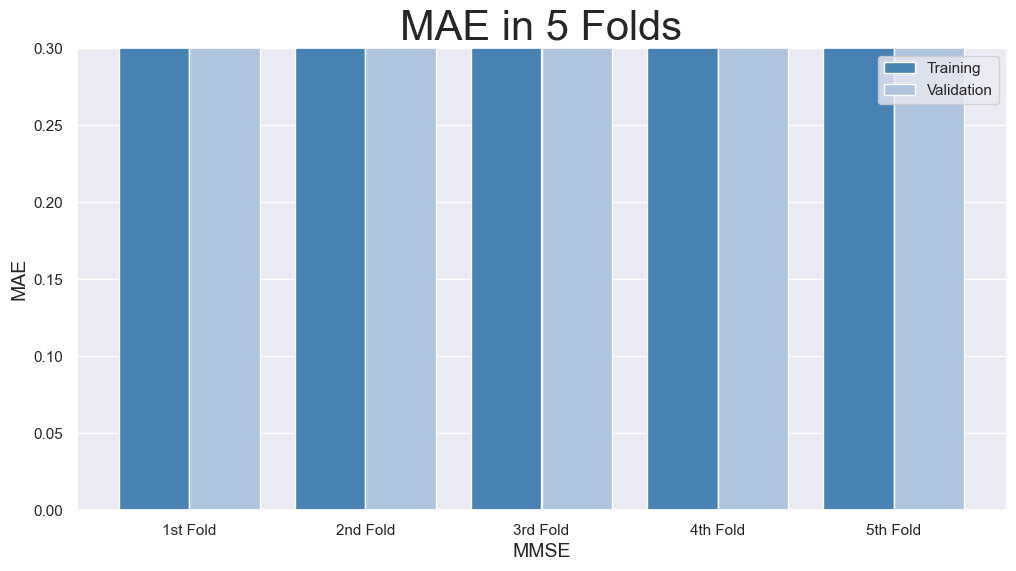

In [21]:
model_name = "MMSE"
plot_result(model_name,
            "MAE",
            "MAE in 5 Folds",
            decision_tree_result["train_mae"],
            decision_tree_result["test_mae"])

# data augmentation

## whisper

In [4]:
import pandas as pd
WhisperForAudioClassification_v2_15k = pd.read_csv('whisper-v2-15k-r-final-fix.csv')
# fivefolds_1k['result'] = np.where(fivefolds_1k['hyps'] >= 0.5,1,0)
WhisperForAudioClassification_v2_15k['name'] =  WhisperForAudioClassification_v2_15k['name'].str.split('\\').str.get(-1)
WhisperForAudioClassification_v2_15k['name'] =  WhisperForAudioClassification_v2_15k['name'].str.split('C').str.get(0).astype(int)
WhisperForAudioClassification_v2_15k = WhisperForAudioClassification_v2_15k.sort_values(by=['name'])
WhisperForAudioClassification_v2_15k = WhisperForAudioClassification_v2_15k.reset_index(drop=True)
WhisperForAudioClassification_v2_15k['label'] = fivefolds_label['label']
WhisperForAudioClassification_v2_15k.head(50)

,name,hyps,truth,ifcorrect,label
0,1,29.736523,30.0,False,Non-Dementia
1,2,30.276001,30.0,False,Non-Dementia
2,3,29.903406,30.0,False,Non-Dementia
3,4,28.969446,23.0,False,Dementia
4,5,29.706245,27.0,False,Dementia
5,6,29.231630,30.0,False,Non-Dementia
6,7,29.991657,30.0,False,Non-Dementia
7,9,30.058729,5.0,False,Non-Dementia
8,10,29.608847,24.0,False,Dementia
9,11,30.153557,16.0,False,Dementia


In [5]:
WhisperForAudioClassification_v2_15k.tail(35)

,name,hyps,truth,ifcorrect,label
50,65,29.693367,25.0,False,Dementia
51,67,29.071678,24.0,False,Dementia
52,68,30.121861,30.0,False,Dementia
53,69,30.236887,30.0,False,Non-Dementia
54,70,29.671576,30.0,False,Non-Dementia
55,71,29.959602,30.0,False,Non-Dementia
56,72,29.505098,30.0,False,Non-Dementia
57,73,29.817801,30.0,False,Non-Dementia
58,74,29.001995,30.0,False,Non-Dementia
59,75,27.533815,30.0,False,Non-Dementia


In [6]:
WhisperForAudioClassification_v2_15k_result = WhisperForAudioClassification_v2_15k['ifcorrect'].tolist()
WhisperForAudioClassification_v2_15k_hyps = WhisperForAudioClassification_v2_15k['hyps'].tolist()
# fivefolds_1_truth = [int(i) for i in fivefolds_1k['truth'].tolist()]
bert_v2_15k_truth = WhisperForAudioClassification_v2_15k['truth'].tolist()

In [7]:
bert_v2_15k_label = WhisperForAudioClassification_v2_15k['label'].tolist()
bert_v2_15k_hyps = [float(i) for i in WhisperForAudioClassification_v2_15k['hyps'].tolist()]
WhisperForAudioClassification_v2_15k_truth = [float(i) for i in WhisperForAudioClassification_v2_15k['truth'].tolist()]
WhisperForAudioClassification_v2_15k_name = [str(i).replace("CTT", "") for i in WhisperForAudioClassification_v2_15k['name'].tolist()]

In [8]:
# print(classification_report(fivefolds_1_truth, fivefolds_1_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_1_truth, fivefolds_1_result).ravel()
# print('sensitivuty: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_1_truth), np.array(fivefolds_1_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))

print('evs: ', metrics.explained_variance_score(WhisperForAudioClassification_v2_15k_truth, WhisperForAudioClassification_v2_15k_hyps))
print('mae: ', metrics.mean_absolute_error(WhisperForAudioClassification_v2_15k_truth, WhisperForAudioClassification_v2_15k_hyps))
print('mse: ', metrics.mean_squared_error(WhisperForAudioClassification_v2_15k_truth, WhisperForAudioClassification_v2_15k_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(WhisperForAudioClassification_v2_15k_truth, WhisperForAudioClassification_v2_15k_hyps)))
print('r2: ', metrics.r2_score(WhisperForAudioClassification_v2_15k_truth, WhisperForAudioClassification_v2_15k_hyps))
total_mae = metrics.mean_absolute_error(WhisperForAudioClassification_v2_15k_truth, WhisperForAudioClassification_v2_15k_hyps)

evs:  -0.07872102382181101
mae:  3.3721419390510112
mse:  38.49678409828082
rmse:  6.204577672838081
r2:  -0.2802374392885758


(0.0, 32.0)

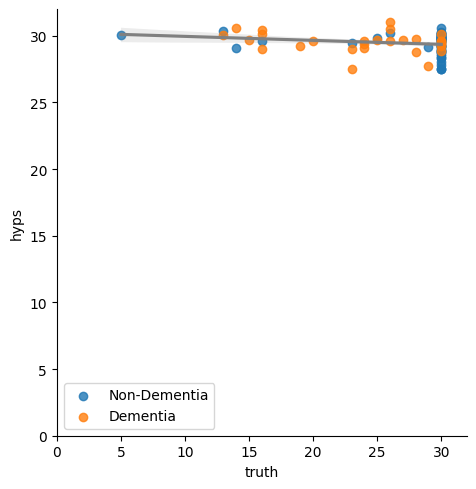

In [9]:
import seaborn as sns
from scipy import stats

# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(WhisperForAudioClassification_v2_15k['truth'],WhisperForAudioClassification_v2_15k['hyps'])

# Use lmplot to plot scatter points
sns.lmplot(x='truth', y='hyps', hue='label', data=WhisperForAudioClassification_v2_15k, fit_reg=False, legend=False)

# Use regplot to plot the regression line and use line_kws to set line label for legend
# ax = sns.regplot(x="truth", y="hyps", data=WhisperForAudioClassification_v2_15k, scatter_kws={"zorder":-1},
# line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept), "color": "green"})
ax = sns.regplot(x="truth", y="hyps", data=WhisperForAudioClassification_v2_15k, scatter_kws={"zorder":-1, "color": "white"}, line_kws={"color": "gray"})

# plot legend
ax.legend()
ax.set_xlim(0, 32)
ax.set_ylim(0, 32)

# save the plot as PNG file
# plt.savefig("MMSE_v2.png")
# plt.savefig("MMSE_v2.jpg")